# Iris dataset analysis and Machine learning

## Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('iris.csv')

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
X = data.drop(columns = 'species')
X = X.values
y = data.species.values

In [5]:
print('y -', type(y), ' X -', type(X))

y - <class 'numpy.ndarray'>  X - <class 'numpy.ndarray'>


## Dataset pre-analysis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.shape

(150, 5)

In [8]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
data.groupby(by = 'species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In the dataset there are 150 observations and 5 features. The target variable is going to be a 'species' column. At this very moment I can't see any anomalies that require any intervention.

## EDA

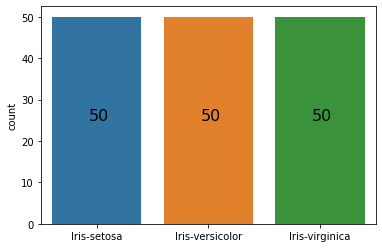

In [10]:
ax = sns.countplot(x = y)

height_species = len(data[data['species'] == 'Iris-setosa'])

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.33, height_species/2), fontsize = 16)

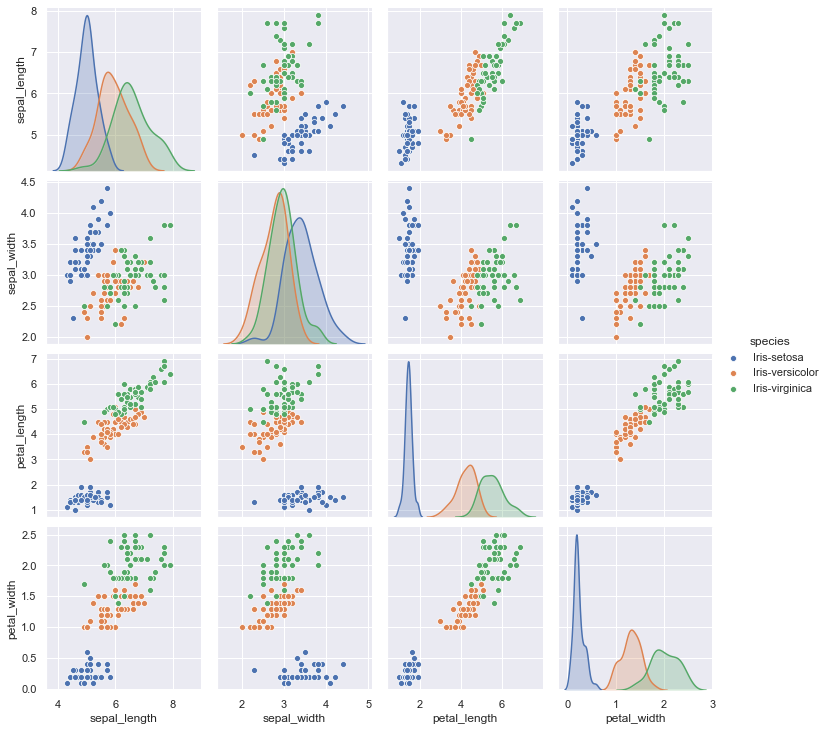

In [11]:
sns.set(style = 'darkgrid')

sns.pairplot(data, hue = 'species')

<AxesSubplot:>

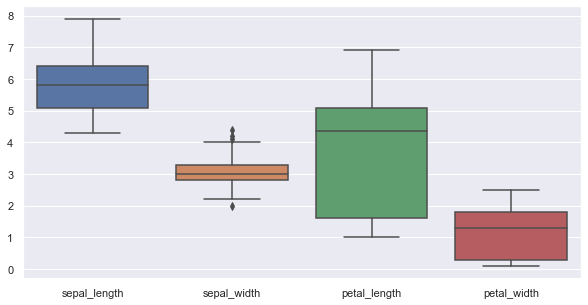

In [12]:
fig = plt.subplots(figsize= (10,5))

columns_var = data.drop(columns = 'species')
species_var = data['species']

sns.boxplot(data = columns_var)

We can find out that the only feature with possible anomalies or outliers is sepal_width. Actually it shouldn't really affect our model. Let's do some exploration around the histograms.

array([[<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>],
       [<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>]], dtype=object)

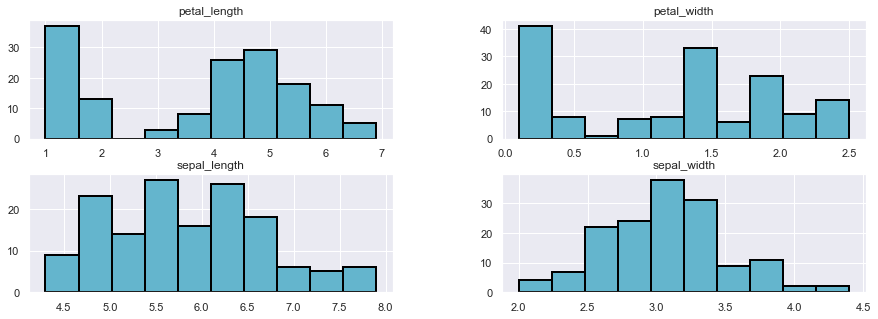

In [13]:
data.hist(stacked = False, figsize = (15,5), color = 'c', linewidth = 2, edgecolor = 'black')

Luckily there aren't any anomalies that need to be fixed. 

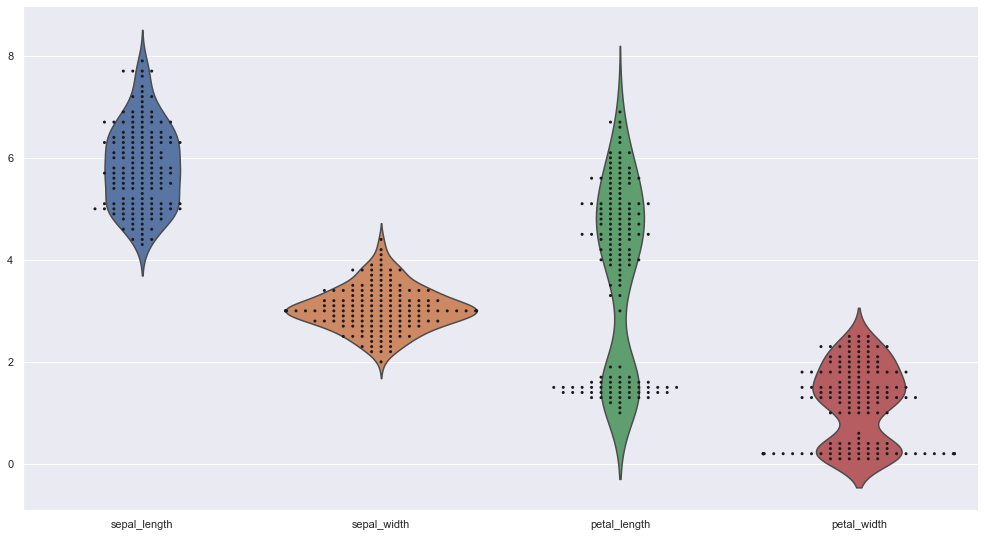

In [14]:
g = sns.catplot(data = columns_var, kind = 'violin', inner = None)
sns.swarmplot(data = columns_var, size = 3, color = 'k')
g.fig.set_size_inches(15,8)

## Checking classification methods

## <center> K-neighbors </center>

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))

0.9555555555555556


In [16]:
y_pred = knn.predict(X_test)

### Various numbers of K-neighbors

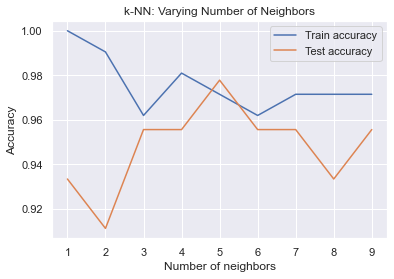

In [17]:
neighbors = np.arange(1,10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, train_accuracy, label = 'Train accuracy')
plt.plot(neighbors, test_accuracy, label = 'Test accuracy')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.legend()

### Visualization of K-neighbors

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

y_train_encoded = LabelEncoder().fit_transform(y_train)
y_train_encoded

scaler = MinMaxScaler( feature_range = (0,1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

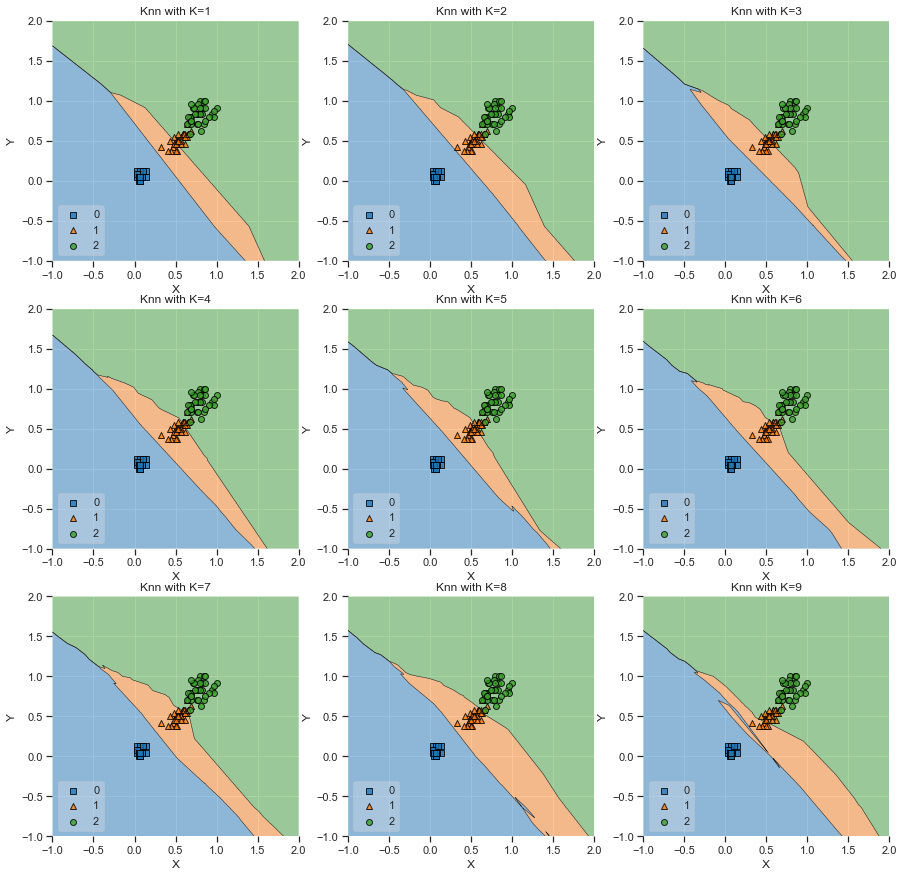

In [19]:
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

feature_values = {i:1 for i in range(0, 2)}  
feature_width = {i:1 for i in range(0, 2)}  


for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train_encoded)
    
    axs = axes[(k-1)//3, (k-1)%3]
    
    # Plotting decision region
    plot_decision_regions(X_train_scaled, y_train_encoded, clf=knn, legend=3, feature_index=[2,3], 
                          filler_feature_values=feature_values,
                          filler_feature_ranges=feature_width,
                          ax = axs)
    
    # Adding axes annotations
    axs.set_xlabel('X')
    axs.set_ylabel('Y')
    axs.set_title('Knn with K=' + str(k))